<a href="https://colab.research.google.com/github/Baldezo313/Some-real-world-machine-learning-project/blob/main/PROJET_6_MODELE_DE_PREDICTION_DES_INTENTIONS_D'ACHATS_DES_UTILISATEURS_D'UNE_BOUTIQUE_EN_LIGNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJET 6 : MODELE DE PREDICTION DES INTENTIONS D'ACHATS DES UTILISATEURS D'UNE BOUTIQUE EN LIGNE  

Une boutique en ligne dispose des données sur chacun des utilisateurs de son site web. Parmi
les différentes variables, il y en a une qui indique si l'utilisateur a terminé sa session par un
achat ou pas.
Un des objectifs de l'analyse de ce jeu de données pourrait être de construire un modèle qui
prédit si un utilisateur donné achètera des produits sur le site web : c'est un cas d'étude de
prédiction des intentions d'achats. Le bénéfice de cette étude est qu'avec un tel modèle, on peut
identifier les variables importantes qui peuvent prédire l'intention d'achat d'un utilisateur sur le
site web. Les résultats permettront ainsi aux décideurs de prendre des mesures concrètes et
efficaces afin d'augmenter les achats sur ce site web.

**LIBRAIRIES**

In [1]:
#Librairies fondamentales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Données
df = pd.read_csv('https://raw.githubusercontent.com/Baldezo313/Some-real-world-machine-learning-project/refs/heads/main/Machine-Learning-par-la-pratique-avec-Python-master/online_shoppers_intention.csv?token=GHSAT0AAAAAAC4VKTEQ47PHK3ERPFSXS44EZ4HTQ3A')
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

La variable Revenue est celle qui indique si l'utilisateur a réalisé un achat (True) ou pas (False).  

Les modèles de Machine Learning utilisent uniquement des données numériques donc nous allons devoir transformer les variables catégorielles en variables numériques.  

Créons d'abord une dataframe des variables indépendantes et une dataframe de la variable cible et sauvegardons-les.

In [4]:
# Variables indépendantes
features = df.drop('Revenue', axis=1)

# Variable dépendante
target = df['Revenue']

# Sauvegarde de données au format csv
features.to_csv('feats.csv', index=False)

target.to_csv('target.csv', header='Revenue', index=False)

* Générons les statistiques descriptives :

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


### ENCODAGE DES VARIABLES CATEGORIELLES  

Les variables à transformer numériquement sont : *Weekend (binaire), VisitorType, Month et
Revenue (binaire)*.

In [7]:
# Lecture de la dataframe des variables indépendantes
data = pd.read_csv('feats.csv')

* Voyons la répartition de la variable binaire Weekend :

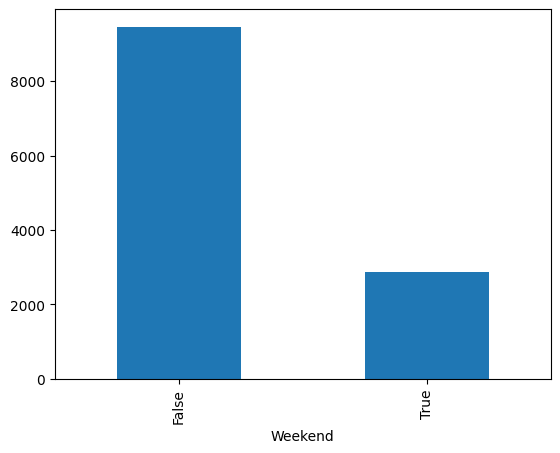

In [8]:
data['Weekend'].value_counts().plot(kind='bar')
plt.show()

Les utilisateurs achètent beaucoup plus en semaine qu'en weekend.

In [9]:
# Encodage
data['is_weekend'] = data['Weekend'].apply(lambda row: 1 if row == True else 0)
# Vérifions que 1 a été mis pour True et que 0 a été mis pour False
data[['Weekend', 'is_weekend']].tail()

,Weekend,is_weekend
12325,True,1
12326,True,1
12327,True,1
12328,False,0
12329,True,1


* L'encodage est réalisé avec succès. On peut maintenant supprimer la colonne Weekend :

In [10]:
data.drop('Weekend', axis=1, inplace=True)

Passons maintenant à la transformation de la variable VisitorType. Cette variable n'est pas
binaire donc nous ne pouvons appliquer la méthode précédente pour la transformer
numériquement. Nous allons plutôt lui appliquer la fonction `pd.get_dummies()`.  

Commençons par visualiser la répartition des modalités de cette variable.

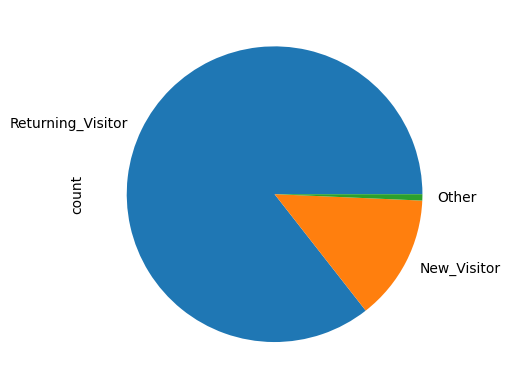

In [11]:
# Modalités de la variable 'VisitorType'
data['VisitorType'].value_counts().plot(kind='pie')
plt.show()

Le site web attire très faiblement de nouveaux visiteurs.

In [12]:
# Application de la méthode pd.get_dummies()
visitor_type_dummies = pd.get_dummies(data['VisitorType'], prefix='VisitorType')
pd.concat([data['VisitorType'], visitor_type_dummies], axis=1).tail()

,VisitorType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
12325,Returning_Visitor,False,False,True
12326,Returning_Visitor,False,False,True
12327,Returning_Visitor,False,False,True
12328,Returning_Visitor,False,False,True
12329,New_Visitor,True,False,False


**Attention :** Quand on applique la méthode pd.get_dummies() sur une colonne, il apparaît une
redondance de l'information. Par exemple, si on a trois modalités dans la variable et que pour
une ligne donnée, deux des trois colonnes créées prennent la valeur 0 alors la troisième colonne
restante a forcément pour valeur 1. Donc il faut supprimer l'une des colonnes créées afin
d'éliminer la redondance de l'information. On élimine la colonne qui a la plus faible occurrence.  

La modalité de plus faible occurrence dans la variable *VisitorType* est : *Other*.

In [13]:
# Suppression de 'VisitorType_Other'
visitor_type_dummies.drop('VisitorType_Other', axis=1, inplace=True)

On colle (concaténation) la dataframe créée avec la dataframe originelle :

In [14]:
# Concaténation
data = pd.concat([data, visitor_type_dummies], axis=1)

# Suppression de l'ancienne variable 'VisitorType'
data.drop('VisitorType', axis=1, inplace=True)

In [15]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,is_weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,False,True


In [18]:
data['VisitorType_New_Visitor'] = data['VisitorType_New_Visitor'].apply(lambda row: 1 if row == True else 0)
data['VisitorType_Returning_Visitor'] = data['VisitorType_Returning_Visitor'].apply(lambda row: 1 if row == True else 0)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,is_weekend,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,1,0,1


* Appliquons le même processus à la colonne Month :

<Axes: xlabel='Month'>

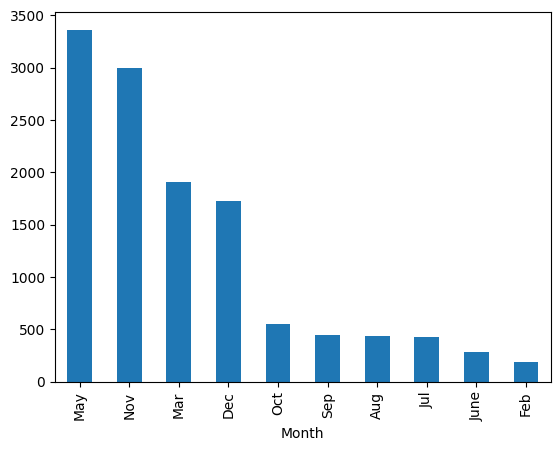

In [19]:
data['Month'].value_counts().plot(kind='bar')

In [20]:
month_dummies = pd.get_dummies(data['Month'], prefix='Month').astype(int)

pd.concat([data['Month'], month_dummies], axis=1).tail()

,Month,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
12325,Dec,0,1,0,0,0,0,0,0,0,0
12326,Nov,0,0,0,0,0,0,0,1,0,0
12327,Nov,0,0,0,0,0,0,0,1,0,0
12328,Nov,0,0,0,0,0,0,0,1,0,0
12329,Nov,0,0,0,0,0,0,0,1,0,0


In [21]:
month_dummies.drop('Month_Feb', axis=1, inplace=True)

In [22]:
data = pd.concat([data, month_dummies], axis=1)
data.drop('Month', axis=1, inplace=True)

In [23]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Aug,Month_Dec,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0


* Passons maintenant à la transformation de la colonne Revenue.

In [24]:
target = pd.read_csv('target.csv')
#Encodage de 'Revenue'
target['Revenue'] = target['Revenue'].apply(lambda row: 1 if row==True else 0)

#Sauvegarde
target.to_csv('target_clean.csv', index=False)

Les variables catégorielles ont été transformé avec succès en variables numériques.

**TYPES APPROPRIES ?**

Il faut toujours vérifier que les données de chaque colonne soient bien stockées dans le format
approprié. Si des colonnes, bien qu'étant numériques, ne sont pas dans le type approprié, alors
il faudra leur appliquer aussi la fonction `pd.get_dummies()`.  

Dans notre cas ici, il s'agit des colonnes OperatingSystems, Browser, TrafficType et Region.
L'identification des colonnes qui ne sont pas stockées dans le format approprié est conditionnée
par une bonne compréhension du jeu de données et du Business auquel vous faites face. Le
Data Analyst ou Data Scientist doit donc être en parfaite collaboration avec les experts du
domaine.  

Passons maintenant à l'encodage des variables citées ci-dessus.


<Axes: xlabel='OperatingSystems'>

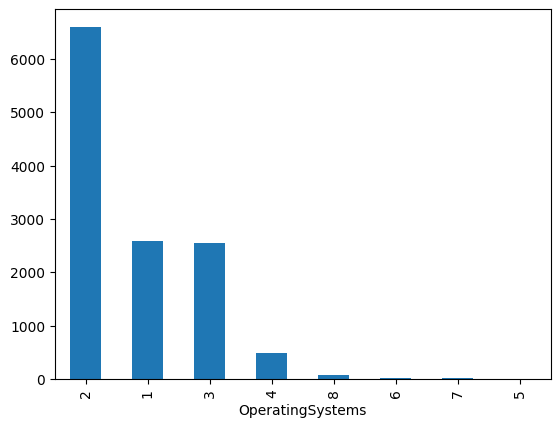

In [25]:
# OperatingSystems
data['OperatingSystems'].value_counts().plot(kind='bar')

In [26]:
operatings_systems_dummies = pd.get_dummies(data['OperatingSystems'], prefix='OperatingSystems')
operatings_systems_dummies.drop('OperatingSystems_5', axis=1,inplace=True)

data = pd.concat([data, operatings_systems_dummies], axis=1)

In [27]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,True,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,False,True,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,False,False,False,True,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,False,False,True,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,False,False,True,False,False,False,False


In [28]:
data['OperatingSystems_1'] = data['OperatingSystems_1'].apply(lambda row: 1 if row == True else 0)
data['OperatingSystems_2'] = data['OperatingSystems_2'].apply(lambda row: 1 if row == True else 0)
data['OperatingSystems_3'] = data['OperatingSystems_3'].apply(lambda row: 1 if row == True else 0)
data['OperatingSystems_6'] = data['OperatingSystems_6'].apply(lambda row: 1 if row == True else 0)
data['OperatingSystems_7'] = data['OperatingSystems_7'].apply(lambda row: 1 if row == True else 0)
data['OperatingSystems_8'] = data['OperatingSystems_8'].apply(lambda row: 1 if row == True else 0)


In [29]:
data['OperatingSystems_4'] = data['OperatingSystems_4'].apply(lambda row: 1 if row == True else 0)

In [30]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='Browser'>

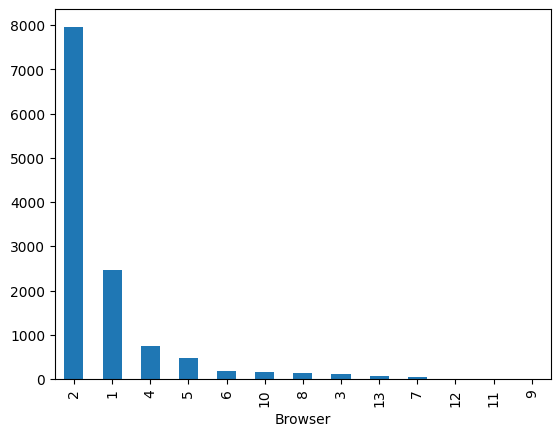

In [31]:
# Browser
data['Browser'].value_counts().plot(kind='bar')

In [35]:
browser_dummies = pd.get_dummies(data['Browser'], prefix='Browser').astype(int)


In [36]:
browser_dummies.drop('Browser_9', axis=1, inplace=True)
data = pd.concat([data, browser_dummies], axis=1)

<Axes: xlabel='TrafficType'>

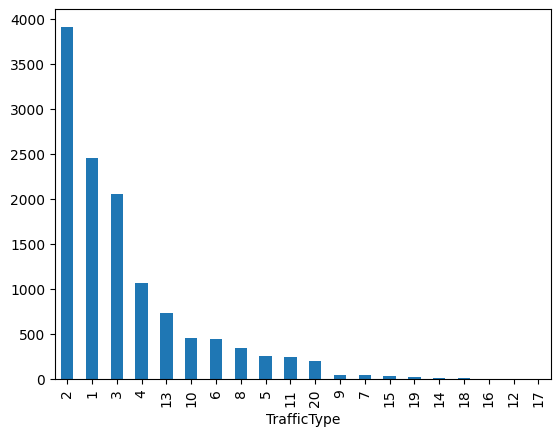

In [37]:
# TrafficType
data['TrafficType'].value_counts().plot(kind='bar')

In [38]:
traffictype_dummies = pd.get_dummies(data['TrafficType'], prefix='TrafficType').astype(int)
traffictype_dummies.drop('TrafficType_17', axis=1, inplace=True)
data = pd.concat([data, traffictype_dummies], axis=1)

<Axes: xlabel='Region'>

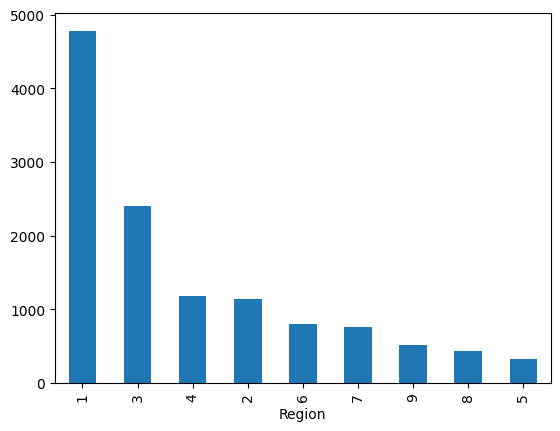

In [39]:
# Region
data['Region'].value_counts().plot(kind='bar')

In [40]:
region_dummies = pd.get_dummies(data['Region'], prefix='Region').astype(int)
region_dummies.drop('Region_5', axis=1, inplace=True)
data = pd.concat([data, region_dummies], axis=1)

In [41]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_19,TrafficType_20,Region_1,Region_2,Region_3,Region_4,Region_6,Region_7,Region_8,Region_9
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  OperatingSystems               12330 non-null  int64  
 11  Browser                        12330 non-null  int64  
 12  Region                         12330 non-null 

Toutes nos variables sont à présent bien codées et dans le format approprié. Avant de passer à
la modélisation, faisons une sauvegarde de nos données.

In [43]:
# Sauvegarde des variables indépendantes
data.to_csv('feats_clean.csv', index=False)

## MODELISATION

* Commençons par importer les données :

In [44]:
features_clean = pd.read_csv('feats_clean.csv')
target_clean = pd.read_csv('target_clean.csv')

Procédons à une division des données en données d'entraînement (80%) du modèle et données
pour l'évaluation du modèle (20%).

In [45]:
from sklearn.model_selection import train_test_split


test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    features_clean, target_clean, test_size = test_size, stratify = target_clean, random_state = random_state)
# Affichage de la dimension des données d'entraînement et de test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9864, 72)
(2466, 72)
(9864, 1)
(2466, 1)


* Construisons un modèle de régression logistique pour prédire l'intention d'achat d'un utilisateur.

In [49]:
# Importation du module LogisticRegression (écrire paragraphe)
from sklearn.linear_model import LogisticRegression


# Création du modèle

model = LogisticRegression(
    solver='liblinear',
    max_iter = 500,
    C = 10,
    penalty = 'l1',
    random_state = random_state)

#Entraînement du modèle
model.fit(X_train, y_train['Revenue'])

# Prédictions sur le test set
yhat = model.predict(X_test)

Passons maintenant à l'évaluation du modèle. Il y a plusieurs paramètres qu'on peut calculer
pour évaluer un modèle de Machine Learning. Veuillez consulter la page de sklearn.metrics pour de plus amples informations sur ces paramètres.

In [50]:
print("Score d'entraînement du modèle :", model.score(X_train, y_train))

Score d'entraînement du modèle : 0.8859489051094891


Est-ce que le modèle est capable de bien se généraliser ? Pour répondre à cette question, nous
devons évaluer le modèle avec les données de Test.

In [51]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix


#Evaluation du modèle
accuracy = accuracy_score(yhat, y_test)
print(f'La précision globale du modèle est {accuracy*100:.2f}%')

La précision globale du modèle est 88.08%


Au vu des scores d’entraînement et d’évaluation, nous pouvons conclure qu’il n’y a pas un
problème de surajustement au niveau du modèle. Le modèle est donc capable de bien se
généraliser.